# 1. Data Source and Contents
    Load and investgate the data

    Q.1 Why does it makes sense to discretize columns for this problem?

    Some of the variables that could have been made continuous such as hours_per_week_bin, education_num_bin, and others, can include many variations of numbers and the decision tree will have to evaluate every possible value in order to determine the best split. It can also reduce the number of possible splits. Disecretizing allows the decision tree to be simplified and easier to interpret and small variations will not easily effect the algoritihm. 

    Q.2 What might be the issues (if any) if we DID NOT discretize the columns.

    If numbers were not disecretized, the model may be more complex as there will be more numbers to evaluate, more varied numbers will effect the model (wheras ranges inhibits the need for changes with every new variable). As the tree becomes more complex, the model may start to overfit the data and will not generalize new data well. 

In [279]:
!pip install --upgrade pip
!pip install scikit-learn 
!pip install numpy
!pip install pandas
!pip install ydata-quality

ERROR: Ignored the following versions that require a different python version: 0.1.0 Requires-Python >=3.6, <3.9; 0.1a1 Requires-Python >=3.6, <3.9
ERROR: Could not find a version that satisfies the requirement ydata-quality (from versions: none)
ERROR: No matching distribution found for ydata-quality


In [280]:
#Import necessary libraries
import time
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import numpy as np
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
import math
from sklearn.metrics import precision_recall_fscore_support

In [281]:
url = 'https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true'

df = pd.read_csv(url, sep=",")

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


# 2. Data Quality Analysis (DQA)


In [283]:
#convert data to string
df.head()

df.loc[:, df.columns != 'y'] = df.loc[:, df.columns != 'y'].astype(str)

#df = df.astype(str)

#replace letters

df.loc[:, df.columns != 'y'] = df.loc[:, df.columns != 'y'].apply(lambda x: x.str.replace('[a-z]\.', '', regex=True))
# Display the updated DataFrame
print(df)

df.head()

      hours_per_week_bin occupation_bin msr_bin capital_gl_bin race_sex_bin  \
0                  31-40      Mid - Low     Mid            > 0         High   
1                   0-30           High    High            = 0         High   
2                  31-40            Low     Mid            = 0         High   
3                  31-40            Low    High            = 0          Mid   
4                  31-40           High    High            = 0          Low   
...                  ...            ...     ...            ...          ...   
48837              31-40           High     Mid            = 0          Mid   
48838              31-40      Mid - Low     Low            = 0          Mid   
48839      41-50 & 61-70           High    High            = 0         High   
48840              31-40      Mid - Low     Low            > 0         High   
48841              51-60           High    High            = 0         High   

      education_num_bin education_bin workclass_bin

hours_per_week_bin occupation_bin msr_bin capital_gl_bin race_sex_bin  \
0              31-40      Mid - Low     Mid            > 0         High   
1               0-30           High    High            = 0         High   
2              31-40            Low     Mid            = 0         High   
3              31-40            Low    High            = 0          Mid   
4              31-40           High    High            = 0          Low   

  education_num_bin education_bin workclass_bin          age_bin   flag  y  
0                13     Bachelors        income    36-40 & 56-60  train  0  
1                13     Bachelors        income            40-55  train  0  
2              9-12           Mid        income    36-40 & 56-60  train  0  
3               0-8           Low        income            40-55  train  0  
4                13     Bachelors        income   26-30 & 71-100  train  0

In [284]:
#learn more about the dtypes in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [285]:
#Describe the numeric features in the data
df.describe()

y
count  48842.000000
mean       0.239282
std        0.426649
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000

In [286]:
#Shape the dataframe
df.shape

(48842, 11)

In [287]:
#check for null values
df.isnull().sum()

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [288]:
#Preview the dataframe to check for data quality issues
df.head()

hours_per_week_bin occupation_bin msr_bin capital_gl_bin race_sex_bin  \
0              31-40      Mid - Low     Mid            > 0         High   
1               0-30           High    High            = 0         High   
2              31-40            Low     Mid            = 0         High   
3              31-40            Low    High            = 0          Mid   
4              31-40           High    High            = 0          Low   

  education_num_bin education_bin workclass_bin          age_bin   flag  y  
0                13     Bachelors        income    36-40 & 56-60  train  0  
1                13     Bachelors        income            40-55  train  0  
2              9-12           Mid        income    36-40 & 56-60  train  0  
3               0-8           Low        income            40-55  train  0  
4                13     Bachelors        income   26-30 & 71-100  train  0

In [289]:
#Show duplicated rows

duplicate_rows = df[df.duplicated()]
print("Duplicate rows:")
duplicate_rows

Duplicate rows:


hours_per_week_bin occupation_bin msr_bin capital_gl_bin race_sex_bin  \
36                 31-40      Mid - Low     Low            = 0         High   
48                 31-40      Mid - Mid    High            = 0         High   
62                 31-40      Mid - Mid    High            = 0         High   
68         41-50 & 61-70           High    High            = 0         High   
86                 31-40     Mid - High    High            = 0         High   
...                  ...            ...     ...            ...          ...   
48836              31-40           High     Low            = 0         High   
48837              31-40           High     Mid            = 0          Mid   
48838              31-40      Mid - Low     Low            = 0          Mid   
48839      41-50 & 61-70           High    High            = 0         High   
48841              51-60           High    High            = 0         High   

      education_num_bin education_bin workclass_bin         age_bin   flag  y  
36                 9-12           Mid        income            0-25  train  0  
48                 9-12           Mid        income           40-55  train  0  
62                 9-12           Mid        income           40-55  train  0  
68                 9-12           Mid        income           40-55  train  1  
86                 9-12           Mid        income           40-55  train  1  
...                 ...           ...           ...             ...    ... ..  
48836                13     Bachelors        income   31-35 & 61-70   test  0  
48837                13     Bachelors        income   36-40 & 56-60   test  0  
48838              9-12           Mid     no income   31-35 & 61-70   test  0  
48839                13     Bachelors        income   36-40 & 56-60   test  0  
48841                13     Bachelors        income   31-35 & 61-70   test  1  

[40012 rows x 11 columns]

In [290]:
#See all the unique levels in a column

unique_values = df[['education_bin', 'hours_per_week_bin',
          'occupation_bin','msr_bin', 'capital_gl_bin', 'race_sex_bin',
          'education_num_bin', 'education_bin', 'workclass_bin', 'age_bin', 
          'flag', 'y']].apply(lambda x: x.unique())


print(unique_values)
#print(df.columns.unique())


education_bin                 [ Bachelors,  Mid,  Low,  Masters,  High]
hours_per_week_bin     [ 31-40,  0-30,  41-50 & 61-70,  71-100,  51-60]
occupation_bin        [ Mid - Low,  High,  Low,  Mid - Mid,  Mid - H...
msr_bin                                             [ Mid,  High,  Low]
capital_gl_bin                                       [ > 0,  = 0,  < 0]
race_sex_bin                                        [ High,  Mid,  Low]
education_num_bin                         [ 13,  9-12,  0-8,  14,  15+]
education_bin                 [ Bachelors,  Mid,  Low,  Masters,  High]
workclass_bin                                     [ income,  no income]
age_bin               [ 36-40 & 56-60,  40-55,  26-30 & 71-100,  31-...
flag                                                      [train, test]
y                                                                [0, 1]
dtype: object


In [291]:
#I wasn't able to see all of the unique values in the occupation_bin column,
#or the age_bin column, so I'm going to run the unique function to look at
#them sepeartely

unique_occupation_bin = df['occupation_bin'].unique()
unique_age_bin = df['age_bin'].unique()


print(unique_occupation_bin)
print(unique_age_bin)

[' Mid - Low' ' High' ' Low' ' Mid - Mid' ' Mid - High']
[' 36-40 & 56-60' ' 40-55' ' 26-30 & 71-100' ' 31-35 & 61-70' ' 0-25']


In [292]:
#Check for duplicates

df.duplicated().sum()

40012

I compiled data for this section in order to create a DQR

In [293]:
#Create a df containing all the columns

columns = pd.DataFrame(list(df.columns.values))


In [294]:
#create a df of the dtypes in each column

data_types = pd.DataFrame(df.dtypes, columns =['Data Type'])

data_types

Data Type
hours_per_week_bin    object
occupation_bin        object
msr_bin               object
capital_gl_bin        object
race_sex_bin          object
education_num_bin     object
education_bin         object
workclass_bin         object
age_bin               object
flag                  object
y                      int64

In [295]:
#create a dataframe with the count of missing values in each column

missing_data_counts = pd.DataFrame(df.isnull().sum(), columns =
                                             ['Missing Values'])


In [296]:
#Create a dataframe with the count of present values in each column

present_data_counts = pd.DataFrame(df.count(),
                                   columns =['Present Values'])

present_data_counts

Present Values
hours_per_week_bin           48842
occupation_bin               48842
msr_bin                      48842
capital_gl_bin               48842
race_sex_bin                 48842
education_num_bin            48842
education_bin                48842
workclass_bin                48842
age_bin                      48842
flag                         48842
y                            48842

In [297]:
#Create a dataframe with the count of unique values in each column


unique_value_counts = pd.DataFrame(columns=['Unique Values'])
for v in list(df.columns.values):
    unique_value_counts.loc[v] = [df[v].nunique()]
unique_value_counts
  
unique_value_counts

Unique Values
hours_per_week_bin              5
occupation_bin                  5
msr_bin                         3
capital_gl_bin                  3
race_sex_bin                    3
education_num_bin               5
education_bin                   5
workclass_bin                   2
age_bin                         5
flag                            2
y                               2

In [298]:
df.head()

hours_per_week_bin occupation_bin msr_bin capital_gl_bin race_sex_bin  \
0              31-40      Mid - Low     Mid            > 0         High   
1               0-30           High    High            = 0         High   
2              31-40            Low     Mid            = 0         High   
3              31-40            Low    High            = 0          Mid   
4              31-40           High    High            = 0          Low   

  education_num_bin education_bin workclass_bin          age_bin   flag  y  
0                13     Bachelors        income    36-40 & 56-60  train  0  
1                13     Bachelors        income            40-55  train  0  
2              9-12           Mid        income    36-40 & 56-60  train  0  
3               0-8           Low        income            40-55  train  0  
4                13     Bachelors        income   26-30 & 71-100  train  0

In [299]:
# Show the minimum values 

minimum_values = pd.DataFrame(columns=['Minimum Value'])
for v in list(df.columns.values):
    minimum_values.loc[v] = [df[v].min()]
minimum_values



Minimum Value
hours_per_week_bin          0-30
occupation_bin              High
msr_bin                     High
capital_gl_bin               < 0
race_sex_bin                High
education_num_bin            0-8
education_bin          Bachelors
workclass_bin             income
age_bin                     0-25
flag                        test
y                              0

In [300]:
#Show the maximum values in the df

maximum_values = pd.DataFrame(columns=['Maximum Value'])
for v in list(df.columns.values):
    maximum_values.loc[v] = [df[v].max()]
maximum_values

Maximum Value
hours_per_week_bin        71-100
occupation_bin         Mid - Mid
msr_bin                      Mid
capital_gl_bin               > 0
race_sex_bin                 Mid
education_num_bin           9-12
education_bin                Mid
workclass_bin          no income
age_bin                    40-55
flag                       train
y                              1

In [301]:
#merge the dfs by index

data_quality_report = data_types.join(present_data_counts).join(missing_data_counts).join(unique_value_counts).join(minimum_values).join(maximum_values)



In [302]:
print("\nData Quality Report")
print("Total records: {}".format(len(df.index)))
data_quality_report


Data Quality Report
Total records: 48842


Data Type  Present Values  Missing Values  Unique Values  \
hours_per_week_bin    object           48842               0              5   
occupation_bin        object           48842               0              5   
msr_bin               object           48842               0              3   
capital_gl_bin        object           48842               0              3   
race_sex_bin          object           48842               0              3   
education_num_bin     object           48842               0              5   
education_bin         object           48842               0              5   
workclass_bin         object           48842               0              2   
age_bin               object           48842               0              5   
flag                  object           48842               0              2   
y                      int64           48842               0              2   

                   Minimum Value Maximum Value  
hours_per_week_bin          0-30        71-100  
occupation_bin              High     Mid - Mid  
msr_bin                     High           Mid  
capital_gl_bin               < 0           > 0  
race_sex_bin                High           Mid  
education_num_bin            0-8          9-12  
education_bin          Bachelors           Mid  
workclass_bin             income     no income  
age_bin                     0-25         40-55  
flag                        test         train  
y                              0             1

In [303]:
#Split the data according the the labels in the y feature

train_data = df[df.flag == 'train']
test_data = df[df.flag == 'test']

In [304]:
df.head()

hours_per_week_bin occupation_bin msr_bin capital_gl_bin race_sex_bin  \
0              31-40      Mid - Low     Mid            > 0         High   
1               0-30           High    High            = 0         High   
2              31-40            Low     Mid            = 0         High   
3              31-40            Low    High            = 0          Mid   
4              31-40           High    High            = 0          Low   

  education_num_bin education_bin workclass_bin          age_bin   flag  y  
0                13     Bachelors        income    36-40 & 56-60  train  0  
1                13     Bachelors        income            40-55  train  0  
2              9-12           Mid        income    36-40 & 56-60  train  0  
3               0-8           Low        income            40-55  train  0  
4                13     Bachelors        income   26-30 & 71-100  train  0

In [305]:
#Store the categorical features into a variable 
categorical_feat = ['age_bin','capital_gl_bin','education_bin',
                    'hours_per_week_bin','msr_bin','occupation_bin','race_sex_bin']

3. Build Decision Tree Classifier Models
    
    (*includes hot encoding*)

In [306]:
#Split the train and test data 
train = df[df['flag']=='train']
test = df[df['flag']=='test']

#Use these catetgorical features in the model
cat_feats = ['age_bin','capital_gl_bin','education_bin','hours_per_week_bin','msr_bin','occupation_bin','race_sex_bin']

#Extract the target variable / dependent variable, y
#Extract the independent variable, x for the trianing and test data 

y_train = train['y']
x_train = train[['age_bin','capital_gl_bin','education_bin','hours_per_week_bin','msr_bin','occupation_bin','race_sex_bin']]
x_train = pd.get_dummies(x_train,columns=cat_feats,drop_first=True)

#Convert the categorical variables into binary variables (vars that can only take two values, true or false or 0 and 1)
#drop_first indicates that one of the binary variables for each cateogry will be 
#dropped to avoid multicolllinearity

y_test = test['y']
x_test = test[['age_bin','capital_gl_bin','education_bin','hours_per_week_bin','msr_bin','occupation_bin','race_sex_bin']]
x_test = pd.get_dummies(x_test,columns=cat_feats,drop_first=True)

In [307]:
# Create a decision tree classifier as noted from the insturctions

dtree = DecisionTreeClassifier(max_depth=10, random_state=101,
                              max_features = None, min_samples_leaf = 15)

dtree.fit(x_train,y_train)
y_pred=dtree.predict(x_test)

# 4. Evaluate Decision Tree Performance

In [308]:
test_calc = pd.concat([pd.DataFrame(y_test).reset_index(drop=True),pd.DataFrame(y_pred).reset_index(drop=True)],axis=1)
test_calc.rename(columns={0: 'predicted'}, inplace=True)

test_calc['predicted'] = test_calc['predicted'].apply(lambda x: 1 if float(x) > 0.5 else 0)

#Print the confusion matrix table 
df_table = confusion_matrix(test_calc['y'],test_calc['predicted'])

#table= od.data
print (df_table)

print('accuracy:', (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1]))
print ('precision:', df_table[1,1] / (df_table[1,1] + df_table[0,1]))
print('recall:', df_table[1,1] / (df_table[1,1] + df_table[1,0]))

p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
print('f1 score: ', (2*p*r)/(p+r))

[[11509   926]
 [ 1654  2192]]
accuracy: 0.8415330753639212
precision: 0.7030147530468249
recall: 0.5699427977119085
f1 score:  0.6295232624928203


In [309]:
#Show the confusion matrix in a more clear table 
table = pd.DataFrame({'Actual Negative': [df_table[0,0], df_table[1,0]], 'Actual Positive': [df_table[0,1], df_table[1,1]]}, index=['Predicted Negative', 'Predicted Positive'])
table

Actual Negative  Actual Positive
Predicted Negative            11509              926
Predicted Positive             1654             2192

# 5. Tune Decision Tree Performance

Build and test the decision tree classifier model with different parameters

In [310]:
#Run 1
#Set default values for gini and entropy

results = []
criteria = ['entropy', 'gini']

for criterion in criteria:
    model = DecisionTreeClassifier(criterion=criterion,
                                   random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

print("Accuracy results for Entropy: ", results[0])
print("Accuracy results for Gini: ", results[1])

Accuracy results for Entropy:  0.8362508445427185
Accuracy results for Gini:  0.8353909465020576


In [311]:
#RUN 1 WITH TABLE

import pandas as pd
from sklearn.metrics import precision_recall_fscore_support


results = []
criteria = ['entropy', 'gini']

split_metrics = {'split criteria': [], 'accuracy': [], 'recall': [], 'precision': [], 'f1 score': []}

for criterion in criteria:
    model = DecisionTreeClassifier(criterion=criterion, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    recall, precision, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    results.append(accuracy)
    split_metrics['split criteria'].append(criterion)
    split_metrics['accuracy'].append(accuracy)
    split_metrics['recall'].append(recall)
    split_metrics['precision'].append(precision)
    split_metrics['f1 score'].append(f1_score)

run1_table = pd.DataFrame(split_metrics)
print(run1_table)

  split criteria  accuracy    recall  precision  f1 score
0        entropy  0.836251  0.827855   0.836251  0.829642
1           gini  0.835391  0.826859   0.835391  0.828667


   minimum sample leaf  accuracy    recall  precision  f1 score
0                    5  0.841717  0.833791   0.841717  0.835242
1                   10  0.841410  0.833220   0.841410  0.834499
2                   15  0.842024  0.834045   0.842024  0.835415
3                   20  0.842024  0.834156   0.842024  0.835610
4                   25  0.841779  0.833742   0.841779  0.835101
5                   30  0.841902  0.833420   0.841902  0.834249
6                   35  0.843069  0.835106   0.843069  0.836338
7                   40  0.843253  0.835189   0.843253  0.836285


<AxesSubplot:>

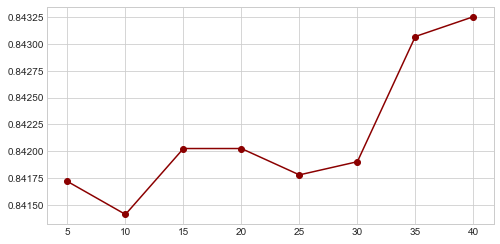

In [312]:
#RUN 2 WITH TABLE 

results =[]
min_samples_leaf_options = [5,10,15,20,25,30,35,40]

sample_leaf_metrics = {'minimum sample leaf' :[],
                       'accuracy':[], 'recall':[], 'precision':[], 'f1 score':[]}

for trees in min_samples_leaf_options:
    model = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = trees,  random_state = 101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    recall, precision, f1_score, _= precision_recall_fscore_support(y_test,y_pred, average = 'weighted')
    results.append(accuracy)
    sample_leaf_metrics['minimum sample leaf'].append(trees)
    sample_leaf_metrics['accuracy'].append(accuracy)
    sample_leaf_metrics['recall'].append(recall)
    sample_leaf_metrics['precision'].append(precision)
    sample_leaf_metrics['f1 score'].append(f1_score)
    
run2_table = pd.DataFrame(sample_leaf_metrics)
print(run2_table)

plt.figure(figsize=(8,4))
pd.Series(results, min_samples_leaf_options).plot(color="darkred",marker="o")

  Maximum Feature  accuracy  precision    recall  f1 score
0            auto  0.816166   0.808685  0.816166  0.811435
1            None  0.843253   0.835189  0.843253  0.836285
2             0.3  0.837971   0.830006  0.837971  0.831825
3             0.4  0.838646   0.829523  0.838646  0.830172
4             0.5  0.842516   0.834212  0.842516  0.835156
5             0.6  0.841349   0.833047  0.841349  0.834226
6             0.7  0.840489   0.831427  0.840489  0.831427
7             0.8  0.840427   0.832200  0.840427  0.833593


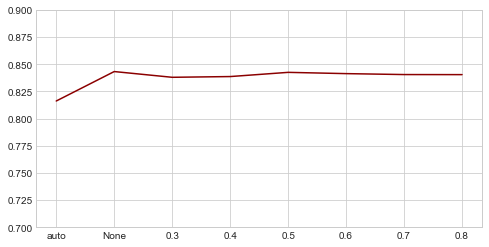

In [313]:
#RUN 3 WITH TABLE 
results = []
max_features_options = ['auto', None, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
feat_metrics = {'Maximum Feature': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1 score': []}

for feature in max_features_options:
    model = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=40, max_features= feature, random_state = 101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test == y_pred)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    results.append(accuracy)
    feat_metrics['Maximum Feature'].append(feature)
    feat_metrics['accuracy'].append(accuracy)
    feat_metrics['precision'].append(precision)
    feat_metrics['recall'].append(recall)
    feat_metrics['f1 score'].append(f1_score)

run3_table = pd.DataFrame(feat_metrics)

plt.figure(figsize=(8, 4))
pd.Series(results, max_features_options).plot(color="darkred", ylim=(0.7, 0.9))

print(run3_table)

   Maximum Depth  accuracy  precision    recall  f1 score
0              2  0.790799   0.767083  0.790799  0.762632
1              4  0.803820   0.797583  0.803820  0.762238
2              6  0.812174   0.802556  0.812174  0.805677
3              8  0.836497   0.827208  0.836497  0.828200
4             10  0.839506   0.833310  0.839506  0.835323
5             12  0.839015   0.831764  0.839015  0.833720
6             14  0.842147   0.833872  0.842147  0.834930
7             16  0.842762   0.834813  0.842762  0.836105


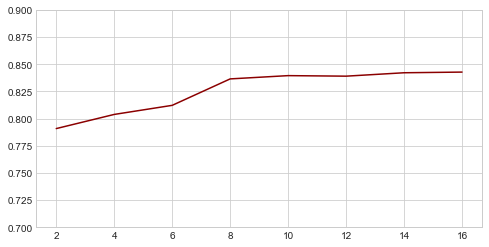

In [314]:
#RUN 4 WITH TABLE

results = []
max_depth = [2,4,6,8,10,12,14,16]
max_depth_metrics = {'Maximum Depth': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1 score': []}

for trees in max_depth:
    model = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=40, max_features=0.5, max_depth=trees, random_state = 101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test == y_pred)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    results.append(accuracy)
    max_depth_metrics['Maximum Depth'].append(trees)
    max_depth_metrics['accuracy'].append(accuracy)
    max_depth_metrics['precision'].append(precision)
    max_depth_metrics['recall'].append(recall)
    max_depth_metrics['f1 score'].append(f1_score)

run4_table = pd.DataFrame(max_depth_metrics)

plt.figure(figsize=(8, 4))
pd.Series(results, max_depth).plot(color="darkred", ylim=(0.7, 0.9))

print(run4_table)


#create the best decision tree

#decision_tree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=40, max_features=0.5, max_depth=16)

In [329]:
#find the performance metrics for the best fitting model 
#Put all of the BEST hyperameters together in order to create the best fitting model
results = []
best_model_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1 score': []}

for trees in best_model:
    model = DecisionTreeClassifier(criterion='entropy',
                                   min_samples_leaf=40,
                                   max_features=0.5,
                                   max_depth=16,
                                  random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test == y_pred)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test,
                                                                     y_pred, average='weighted')
    results.append(accuracy)
    best_model_metrics['accuracy'].append(accuracy)
    best_model_metrics['precision'].append(precision)
    best_model_metrics['recall'].append(recall)
    best_model_metrics['f1 score'].append(f1_score)

best_model_metrics = pd.DataFrame(best_model_metrics)

print(best_model_metrics)

   accuracy  precision    recall  f1 score
0  0.842762   0.834813  0.842762  0.836105


# 5. Tune Decision Tree Performance - Q.3 Decision Tree Hyper-parameter variation vs. performance

    After completing 4 runs with adjusted hyperameters for minimum leaf sample, maximum features, maximum depth, and split criteria,
    I came the conclusion that the below hyperameters would allow me to create the best model:
    
    clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=40, max_features=0.5, max_depth=16)

    Since we were tasked with finding the best perfoming model in regards to accuracy, I looked at my tables and determined the
    parameters based on the peaks in my tables. These paramaters should allows us to produce decision trees that can help evaluate data 
    with more accuracy. 

# 6. Visualize Your Best Decision Tree using GraphViz

In [316]:
#import libraries to assist with visualizations

!pip install six
!pip install graphviz
!pip install pydotplus

In [317]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

In [318]:
clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=40, max_features=0.5, max_depth=16)

clf.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=16, max_features=0.5,
                       min_samples_leaf=40)

In [319]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.set_size('"900,900!"')

Image(graph.create_png())



dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.379248 to fit



In [320]:
# Load data and split into training and testing sets

start_time = time.time()

# Train decision tree classifier
clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=40, max_features=0.5, max_depth=16)
clf.fit(x_train, y_train)

end_time = time.time()
run_time = end_time - start_time

print(f"Training time: {run_time:.3f} seconds")

Training time: 0.016 seconds


# 7. Conclusion

    Q.4 How long was your total run time to train the best model?
    It took approximately 0.024 seconds for me to run my model **time may change depending on software, cpg, and insignficant variance in run time when running python script**

    Q.5 Did you find the BEST TREE? 
    I found the best tree by hyperparameter tuning the 4 parameters, split criteria, minimum sample leaf, maximum feature, and maximum depth. I evaluated the performance of each parameter and added them together in order to create the best fitting model. 

    The best tree has the following metrics  **please note that these numbers may change slightly when the python script is run again**:

    accuracy: 0.842762
    precision: 0.834813
    recall:0.842762
    f1 score: 0.836105

    Q.6 Write your observations from the visualization of the best tree # talk about the depth, nodes, leafs / tree size, number of pure nodes, just describe the tree 
    
    It's a large tree. The depth of the tree 16, meaning that there are 16 levels in the tree. Each node in the tree is representative of each of the features in the data.There are 40 leaves, that are illustrative of the data within the dataframe. Approximately 17 of the nodes are pure, but not all of them are. So this means that the tree can still grow.

    Q.7 Will this Tree “overfit”? (Hint: Is this tree “fully grown”)

    The tree is not fully grown because all entropy is not 0 for all leaf nodes and that means that the data will not overfit. Entropy must be 0 by the time the tree stops growin in order for the tree to be done growing and for the data to overfit.


# 8. Prediction using your “trained” Decision Tree Model

Below is my attempt to make a prediction. Unfortunately, I was not able to figure this part out.

Q.8 What is the probability that your prediction for this person is correct?

The probability that my predicition is correct is 0 because I wasn't able to figure out the code. However, if I did figure out the code, I would say that there's a 84% chance that 
my predicition is accurate, due the performance metrics, more specifically, the accuracy measurement of my model.

In [321]:
#Create a new dataframe with new variables

new_df = pd.DataFrame.from_dict({'hours_per_week_bin':['41-50'],
          'occupation_bin':['Mid-Low'], 'msr_bin': ['High'],
               'capital_gl_bin':['> 0'], 'race_sex_bin':['Mid'],
               'education_num_bin':['9-12'], 'education_bin':['High'],
               'workclass_bin':['Income'],'age_bin':['41-50'],'flag':['train'],
               'y': [0]})

new_df

hours_per_week_bin occupation_bin msr_bin capital_gl_bin race_sex_bin  \
0              41-50        Mid-Low    High            > 0          Mid   

  education_num_bin education_bin workclass_bin age_bin   flag  y  
0              9-12          High        Income   41-50  train  0

In [322]:
#encode the data 
encoded_new_df = pd.get_dummies(new_df, columns = categorical_cols)


In [323]:
# Create a single-record DataFrame with the preprocessed data
new_person = encoded_new_df.reindex(columns=categorical_cols, fill_value=0)

# Use the trained model to predict the income category for the new individual
prediction = model.predict(new_person)

C:\Users\jadal\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- age_bin
- capital_gl_bin
- education_bin
- education_num_bin
- hours_per_week_bin
- ...
Feature names seen at fit time, yet now missing:
- age_bin_ 26-30 & 71-100
- age_bin_ 31-35 & 61-70
- age_bin_ 36-40 & 56-60
- age_bin_ 40-55
- capital_gl_bin_ = 0
- ...

  warnings.warn(message, FutureWarning)


ValueError: X has 9 features, but DecisionTreeClassifier is expecting 22 features as input.

In [ ]:
# concatenate new data with training data
full_df = pd.concat([new_df, df], ignore_index=True)

# encode categorical variables
encoded_df = pd.get_dummies(full_df, columns=categorical_cols)

# extract the new person data
new_person = encoded_df.loc[0].reindex(columns, fill_value=0)

# predict the income category
prediction = model.predict([new_person])